In [ ]:
# immporting libraries:
#from google.colab import files # for google colab
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Will be used for visulaization
import sympy as sp              # Will be used for symbolic of matrices syntax
import tracemalloc              # will be used for  memory allocaiton calculations
import time                     # will be used for time execution calculations


# Executive Summary

# **0. Introduction**

The aim of this project is to  show that even though gaussian elimination is a great algorithm for linear systems, it is impractical for large number of variables as number of operations rapdily increased. To show that, three numerical methods are used to be compared with he gaussian elimination and thmeselves in terms of time of execution, memory used, and number of iterations. <br> The numerical methods used are:
 - Jacobi Method
 - Guass-Seidel Method
 - Succesive Over Relaxation Method 




# **1. Jacobi Method**

## **1.1 Background Information**

### What is the Jacobi Method?
The Jacobi method is an iterative method to determine solutions for a **strictly diagonal system of linear equations**. The method iterates through the matrix until it converges to a solution for all the variables. A general system of linear equations is provided in Figure 1.

<br><center>
![Picture](https://drive.google.com/uc?export=view&id=19LwfDwPyFsCszEPXUe7b7Mzatnl2abxy)

<font size =3>*Figure 1*</font>
</br></center>


###Assumptions
There are two key assumptions for the Jacobi method to work. The reason that these assumptions are needed is so that the system can converge to a solution. Otherwise, it will diverge and iterate indefinitely.
1. **The matrix is diagonally dominant.** A strictly diagonal
system is defined as a square matrix whereby the absolute value of the diagonal entry in a row is greater than the absolute sum of the remaining values in that row.

2. **The leading diagonal term of each row is non-zero.**
<br></br>
<br></br>

## **1.2 Procedure**
The way that it works is by making an initial guess for the variable **<i>X<sub>n</sub></i>**. The objective of these guesses is to allow the system to converge to a specific solution. To demonstrate this method, an example matrix and its corresponding solution is provided in the steps below.

<br></br>

---



**Step 1**: Ensure that the system of equations/matrix is diagonally dominant. The matrix below meets this condition, based on the explanation provided above.

In [ ]:
init_printing(use_unicode=True)

x1 = Symbol('X\u2081')
x2 = Symbol('X\u2082')
x3 = Symbol ('X\u2083')

print('The system of linear equations is: ')
row1 = sp.Eq(4*x1 + 2*x2 - 2*x3, 0)
row2 = sp.Eq(x1 - 3*x2 - x3, 7)
row3= sp.Eq(3*x1 - x2 + 4*x3, 5)

display(row1)
display(row2)
display(row3)

print('\n')

print('The matrix form of Ax=b is: ')
Ax = Matrix([[4, 2, -2],[1, -3, -1],[3, -1, 4]])
B = Matrix([[0], [7], [5]])

Ax, B


The system of linear equations is: 




The matrix form of Ax=b is: 


⎛⎡4  2   -2⎤  ⎡0⎤⎞
⎜⎢         ⎥  ⎢ ⎥⎟
⎜⎢1  -3  -1⎥, ⎢7⎥⎟
⎜⎢         ⎥  ⎢ ⎥⎟
⎝⎣3  -1  4 ⎦  ⎣5⎦⎠

**Step 2:** Isolate each variable corresponding to the row that it belongs in. For example, row 1 corresponds to X<sub>1</sub>.

Make an initial guess for each value of **X<sub>i</sub>.** The first guess can be any number, as long as the matrix meets the Jacobi Method assumptions. It is worth noting that the farther away the guess from the actual answer, the more iterations the system will take to converge. For this example, the first guess for the variables will be 0.

In [ ]:
row1 = sp.Eq(x1, (-x2+x3)/2)
row2 = sp.Eq(x2, (-7/3) -x1 - (1*x3/3))
row3 = sp.Eq(x3, (5/4)-((3*x1)/4) + (3*x3/4))

display(row1)
print('\n')
display(row2)
print('\n')
display(row3)

**Step 3:** After making the initial guess, keep iterating until the system converges. For this project, the system will converge once the difference between the current iteration and the previous one is zero, for the given number of decimal places. This example will use two decimal places as its tolerance.
<br></br>
The table below represents a sample number of iterations to show how the method is performed.

<br></br>
**Note that the total number of iterations is 38. X<sub>1</sub> = 1.00, X<sub>2</sub> = -2.00, and X<sub>3</sub>=0.00. This concludes the Jacobi Method example**



In [ ]:
data = {'k = 1':  ['0', '-2.33', '1.25'],
        'k = 2': ['1.79', '-2.75', '0.67'],
        'k = 3': ['0.59', '-1.50', '-0.52'],
        '...': ['...','...', '...'],
        'k = 38': ['1.00', '-2.00', '0.00']
        }


df = pd.DataFrame(data, index = ['X\u2081', 'X\u2082', 'X\u2083'])

print (df)

    k = 1  k = 2  k = 3  ... k = 38
X₁      0   1.79   0.59  ...   1.00
X₂  -2.33  -2.75  -1.50  ...  -2.00
X₃   1.25   0.67  -0.52  ...   0.00


# **2. Gauss-Seidel Method**

## **2.1 Background Information**

### What is Guass-Siedel Method?
It is an improved version of Jacobi method which is used as an iterative method for solving equations of diagonally dominant system of linear equations.
### Assumptions
 - Ax = b has a unique solution 
 - Number of equations should be equal to number of variables (square matrix)
 - 	There is no zero entry in the pivots
 
###  Important Notes
* Works with diagonally dominant system of equations
    - The absolute value of the diagonal element should be greater than or equal to the summation of the absolute values of the other variables of the that row
    - This is to ensure that we have a unique solution. Another way to check is when the determinant is not equal 0.
*	Uses the latest update value (not like Jacobi where they are used in the next iteration)

### Steps
- Check whether it is diagonally dominant or not (you can switch rows to pass)
    * **WHY?** To ensure the convergence of the estimation & we have a unique solution
- Re-write the independent equations and solve each one for a different variable
    * **Tip:** solve the 1st equation for the 1st variable and so on.
- Set initial assumption for all variables (except the 1st one) to be equal zero to find a value for the 1st variable
- **NOTE:** this is if we don’t have information about the expected values of the variables
- Use the updated value for the 1st variable along with the initial guess (zeros) to find a value for the 2nd equation
- Repeat the previous step
- We stop when the difference between each consecutive values of everyvariable is less than the pre-defined tolerance

### MathSyntax 

![picture](https://drive.google.com/uc?export=view&id=1IlxIsgSlnGtIPWjPlPNJ00YFK012r78D) 

![picture](https://drive.google.com/uc?export=view&id=1LuqS4AI8qGiATNdQLkfGqODFzBxuT6Q-) 

### Advantages
- Faster than some other estimation methods like Jacobi since it uses the latest values other than use them after a complete iteration

### Disadvantages
- The number of equations should be equal the number of unknowns which means a square matrix which is not this case in most real applications
- It has to be diagonally dominant whcih will narrow the applications further

### Code
**The code requires three inputs:**
- The matrix (if not a random matrix) or the Matrix size: Mat_size (if random matrix_)
- Maximum number of iterations: n_it
- Tolerance by specifying the decimals in the round function

# **3. Succesive Over Relaxation Method**


## **3.1 Background Information**

### What is Succesive Over Relaxation Method?

This is one of the  iterataive methods that attempt to solve Ax = b in high order matrices. It improves upon Gauss-Siedel Method.

• ω - Relaxation factor

• If ω = 1, the SOR method becomes Gauss-Seidel Method

• For overrelaxation 1 < ω < 2

• For underrelaxation, ω < 1

• The method diverges if ω >= 2

• n is the number of rows OR columns of the square matrix A

• k is the iteration number (1 <= k <= num_Iteration) num_Iteration – total number of allocated iterations

• A relaxation factor ω is multiplied to the residual value calculated.

• Convergence is generally quicker when optimum value of ω is chosen.


<b>Algorithim summary:</b> 

x(i,k+1) = x(i,k) + ω * (R(i,k)/a(i,i)), (1 <= i <= n)

<b>Residual Calculatinn:</b> 

R(i,k) = b(i) - (Sum(A(i,j) (for 1 <= j <= i-1)) * x(j,k + 1) - (Sum(A(i,j) (for i <= j <= n)) * x(j,k) , (1 <= i <= n)

# **4. Comparison Methdology**

In order to compare the four methods against each other, there will be two variables that will change:
1. The size of the squared matrix (5x5, 20x20, 50x50, 100x00)
2. The tolerance of the iterations (3 decimal points, and 6 decimal points). In theory, the higher the tolerance, the longer the code should take to execute for any method.

**Important Notes:**

* To streamline the comparison process and make it time-efficient, only one example will be shown in the code for all four methods, and the full results will be presented in the "Results Summary" section. It is easy to alter the code to test different matrix sizes and different tolerances.

* To calculate execution time, the following code will be used:
 - import time <br>
 - start_time = time.time() <br>
 - main code()  <br>
 - print("--- %s seconds ---" % (time.time() - start_time)) 

* Execution time may differ between each device. The time that the matrix takes to converge can also vary on the same device.
    - Therefore, we will use the same device for all runs
* Execution time is not an accurate way to assess the performance of methods since it may differ dependes on the logic of the code, while the number of iterations should be fixed in by code it was built correctly with the same tolerance

## 4.1 Generate a Random Matrix
**The codes for Jacobi & Guass-Seidel require three inputs:**
- The matrix (if not a random matrix) or the Matrix size: **Mat_size** (if a random matrix)
- Maximum number of iterations: **n_it**
- Tolerance by specifying the decimals in the round function: **Tol**
**The code for SOR requires an extra input:**
- Relaxation Facotr: **RelFac**

### 4.1.1 Generate a Random Matrix: 100x100 with tolerance: 6

In [ ]:
# Generate a Random Matrix: Ax = B

# inputs
n_it = 3000    # Max number of iterations 
Tol =  6      # Tolerance
Mat_size = 100 # Matrix size: Mat_size x Mat_size 


# 1st argument --> numbers ranging from 0 to it (excluded),  
# 2nd argument, row = , col =  

np.random.seed(123) # For reproducebility
A = np.random.randint(100, size=(Mat_size, Mat_size)) # Elements values can be from 0 to 100 (exclusive)
B = np.random.randint(100, size=(1, Mat_size))        # Elements values can be from 0 to 100 (exclusive)


    


# There will be a function that will enforce the code to not do any calculation when the matrix is not diagonally dominant.
# However, this is code is to force it to be dominant so we can compare the methods


# This code is to enforce the matrix to be diagonally dominant by assign new values for diagonal coefficients whcih are the sum of all row's elements including them
i = 0
while i < Mat_size :
    A[i][i] = np.sum(np.abs(A[i]))
    i = i + 1
print(A)



# Check whether tha matrix is diagonally dominant or not
def dia_dom(A):
    D = np.diag(np.abs(A))            # Find diagonal coefficients
    S = np.sum(np.abs(A), axis=1) - D # Find row sum without diagonal
    if np.all(D >= S):
        dia_dom = 1
        print ('matrix is diagonally dominant \n')
    else:
        dia_dom = 0
        print( 'NOT diagonally dominant \n')
    return dia_dom

    
dia_dom(A)



[[5278   92   98 ...    9   87   14]
 [  83 5074   12 ...   75   10    3]
 [  45   58 5117 ...   38    1   52]
 ...
 [  35   65   40 ... 5784   43   47]
 [   9   72   53 ...   90 4844   11]
 [  31   49   64 ...   60   10 4448]]
matrix is diagonally dominant 



1

#### 4.1.1.1 Jacobi Method

In [ ]:
start_time = time.time() # Set-up time execution calculation:
tracemalloc.start()      # Set-up memory trace

# Create two lists: one with initilas guesses = 0 and it is size is as the varibles number, the other is to save a full iteration
i = 0
x = [] # An empty list
while i < Mat_size :
    x.append(0)
    i= i + 1

i = 0
y = [] # An empty list, because will will use a full of old values each iteration
while i < Mat_size :
    y.append(0)
    i= i + 1



# Main code
if dia_dom(A) == 1 :          # To ensure that the condition is valid (diagonally dominant)
    print("The number of variables is:",Mat_size)
    print("The maximum number of iterations is:",n_it)
    print("The number of digitis for tolerance is:",Tol,"\n")
    for ii in range(n_it) : 
        i = 0               # Reset after each iteration
        j = 0               # Reset after each iteration
        z = 0               # Reset after each iteration
        while z < Mat_size :   # Same purpose as 
            y[z] = B[0][z]/A[z][z]
            z = z + 1
        while i < Mat_size :   # Less than number of variables
            j = j +1
            if j == Mat_size:
                i = i + 1
                if i == Mat_size :        # otherwise, we will get an error
                  while i >= 0 :
                        x[i-1] = y[i-1]
                        i = i -1 
                  roundx =  [round(element,Tol) for element  in x]  # To specify number of decimals
                  if ii == 0 :
                        roundy = roundx
                        print("after iteration:",ii + 1,roundx)
                  else :
                        if roundy == roundx:
                              break
                        roundy = roundx
                        print("after iteration:",ii + 1,roundx)  
                  break
                j = 0
                y[i] = B[0][i]/A[i][i]
            if i == j:
                continue
            y[i] = y[i]  -(A[i][j]*x[j])/A[i][i]

# Caluclation is over, now extract memorey allocation and time execuation
MemAlloc= tracemalloc.get_traced_memory()
print("Memory allocation is :",MemAlloc[1] - MemAlloc[0], "kib")
tracemalloc.stop() # Stop Tracing Memory

print("Execution time is", "--- %s seconds ---" % (round(time.time() - start_time,5))) # five digits

matrix is diagonally dominant 

The number of variables is: 100
The maximum number of iterations is: 3000
The number of digitis for tolerance is: 6 

after iteration: 1 [0.006063, 0.003547, 0.006058, 0.016501, 0.020109, 0.020417, 0.001266, 0.00275, 0.004173, 0.009951, 0.008126, 0.005034, 0.006978, 0.020065, 0.002792, 0.005435, 0.008457, 0.000438, 0.012016, 0.01291, 0.007044, 0.007721, 0.011874, 0.016673, 0.010464, 0.015065, 0.000208, 0.011207, 0.008761, 0.005057, 0.006043, 0.000569, 0.019208, 0.003259, 0.001811, 0.008871, 0.01962, 0.011911, 0.004895, 0.00322, 0.019355, 0.001009, 0.013926, 0.013095, 0.019175, 0.014505, 0.016752, 0.01844, 0.011276, 0.0, 0.012351, 0.017766, 0.0, 0.01251, 0.018461, 0.012339, 0.000745, 0.009263, 0.006284, 0.013807, 0.005224, 0.017592, 0.000583, 0.013109, 0.015961, 0.023212, 0.020886, 0.002966, 0.015434, 0.014175, 0.004336, 0.018861, 0.012806, 0.004435, 0.004293, 0.00499, 0.001263, 0.002946, 0.006804, 0.016308, 0.014208, 0.004137, 0.018371, 0.00796, 0.019143

#### 4.1.1.2 Gauss-Seidel Method

In [ ]:
start_time = time.time() # Set-up time execution calculation:
tracemalloc.start()      # Set-up memory trace


# Creat a list with intials guesses = 0 and it is size is as the varibles number
i = 0
x = [] # An empty list
while i < Mat_size :
    x.append(0)
    i= i + 1

# This is necessary for i = j = 0
x[0] = B[0][0]/A[0][0]

# Main code
if dia_dom(A) == 1 :           # To ensure that the condition is valid (diagonally dominant)
    print("The number of variables is:",Mat_size)
    print("The maximum number of iterations is:",n_it)
    print("The number of digitis for tolerance is:",Tol,"\n")
for ii in range(n_it) : 
    i = 0               # Reset after each iteration
    j = -1              # Reset after each iteration
    while i < Mat_size :   # Less than number of variables
        j = j +1
        if (i == 0) & (j == 0) :   # Otherwise, x[0] in the last line will be subtracted from th previous iteration's value
            x[0] = B[0][0]/A[0][0]
        if j == Mat_size:
            i = i + 1
            if i == Mat_size :        # otherwise, we will get an error
                roundx =  [round(element,Tol) for element  in x]  # To specify number of decimals
                if ii == 0 :
                    roundy = roundx
                    print("after iteration:",ii + 1,roundx)
                else :
                    if roundy == roundx:
                        break
                    roundy = roundx
                    print("after iteration:",ii + 1,roundx)
                break
            j = 0
            x[i] = B[0][i]/A[i][i]
        if i == j:
            continue
        x[i] = x[i]  -(A[i][j]*x[j])/A[i][i]

# Caluclation is over, now extract memorey allocation and time execuation        
MemAlloc= tracemalloc.get_traced_memory()
print("Memory allocation is :",MemAlloc[1] - MemAlloc[0], "kib")
tracemalloc.stop() # Stop Tracing Memory

print("Execution time is", "--- %s seconds ---" % (round(time.time() - start_time,5))) # five digits

matrix is diagonally dominant 

The number of variables is: 100
The maximum number of iterations is: 3000
The number of digitis for tolerance is: 6 

after iteration: 1 [0.006063, 0.003448, 0.005966, 0.016428, 0.019676, 0.019722, 0.000822, 0.002038, 0.003187, 0.009116, 0.007325, 0.00407, 0.006036, 0.019177, 0.001708, 0.004672, 0.007652, -0.000713, 0.0107, 0.011022, 0.00518, 0.005847, 0.009741, 0.015062, 0.008256, 0.012591, -0.001451, 0.009268, 0.006704, 0.001959, 0.003442, -0.001787, 0.016533, 0.000499, -0.00049, 0.006451, 0.016697, 0.008945, 0.002347, 0.000161, 0.016584, -0.002147, 0.011278, 0.00995, 0.016099, 0.01098, 0.012996, 0.014158, 0.007651, -0.003628, 0.007939, 0.013295, -0.003654, 0.008702, 0.014394, 0.007964, -0.003481, 0.004346, 0.002286, 0.009261, 0.000585, 0.013631, -0.004291, 0.008863, 0.011819, 0.019004, 0.015483, -0.002055, 0.010974, 0.008725, -0.000796, 0.013938, 0.007893, -0.001279, -0.000762, -0.000641, -0.00403, -0.00224, 0.001681, 0.01127, 0.009161, -0.001709, 0.0

####  4.1.1.3 Succesive Over Relaxation

In [ ]:
start_time = time.time() # Set-up time execution calculation:
tracemalloc.start()      # Set-up memory trace


# Relaxtion Factor which is an extra input for this method. Note, if it is = 1, IT is Guass-Seidel exactly
RelFac = 1.5



# Creat a list with intials guesses = 0 and it is size is as the varibles number
i = 0
x = [] # An empty list
while i < Mat_size :
    x.append(0)
    i= i + 1
    
i = 0
y = [] # An empty list, becuae we will calculate the new value for a var by using even its pervious value
while i < Mat_size :
    y.append(0)
    i= i + 1
    
    
# This is necessary for i = j = 0
x[0] = B[0][0]/A[0][0]



# Main code
if dia_dom(A) == 1 :       # To ensure that the condition is valid (diagonally dominant)
    print("The number of variables is:",Mat_size)
    print("The maximum number of iterations is:",n_it)
    print("The number of digitis for tolerance is:",Tol)
    print("The relaxation facotr is:",RelFac,"\n")
for ii in range(n_it) :
    i = 0               # Reset after each iteration
    j = -1              # Reset after each iteration
    while i < Mat_size :   # Less than number of variables
        if i != 0:
            x[i] = x[i] * RelFac +  (1-RelFac)*y[i]
            y[i] = x[i]
        j = j +1
        if (i == 0) & (j == 0) :   # Otherwise, x[0] in the last line will be subtracted from th previous iteration's value
            x[0] = B[0][0]/A[0][0]
        if j == Mat_size:
            i = i + 1
            if i == Mat_size :        # otherwise, we will get an error
                roundx =  [round(element,Tol) for element  in x]  # To specify number of decimals
                if ii == 0 :
                    roundy = roundx
                    print("after iteration:",ii + 1,roundx)
                else :
                    if roundy == roundx:
                        break
                    roundy = roundx
                    print("after iteration:",ii + 1,roundx)
                break
            j = 0
            x[i] = B[0][i]/A[i][i]
        if i == j:
            continue
        x[i] = x[i]  -(A[i][j]*x[j])/A[i][i]


# Caluclation is over, now extract memorey allocation and time execuation
MemAlloc= tracemalloc.get_traced_memory()
print("Memory allocation is :",MemAlloc[1] - MemAlloc[0], "kib")
tracemalloc.stop() # Stop Tracing Memory

print("Execution time is", "--- %s seconds ---" % (round(time.time() - start_time,5))) # five digits

matrix is diagonally dominant 

The number of variables is: 100
The maximum number of iterations is: 3000
The number of digitis for tolerance is: 6
The relaxation facotr is: 1.5 

after iteration: 1 [0.006063, 0.005172, 0.008919, 0.024602, 0.029282, 0.029102, 0.000928, 0.002561, 0.004128, 0.013146, 0.010449, 0.00547, 0.00846, 0.028221, 0.001903, 0.006526, 0.011021, -0.001779, 0.015196, 0.015335, 0.006628, 0.007631, 0.013266, 0.021623, 0.011017, 0.017372, -0.003149, 0.012752, 0.008863, 0.001003, 0.003687, -0.004042, 0.023292, -0.000822, -0.001999, 0.008252, 0.023347, 0.011759, 0.002079, -0.001403, 0.023398, -0.004929, 0.015574, 0.013252, 0.022596, 0.014644, 0.017478, 0.018852, 0.009508, -0.007383, 0.009539, 0.017633, -0.007323, 0.011123, 0.019619, 0.009669, -0.00734, 0.003988, 0.001528, 0.011751, -0.001472, 0.018715, -0.008772, 0.011335, 0.015966, 0.026495, 0.020571, -0.005445, 0.014493, 0.010516, -0.003526, 0.018721, 0.009632, -0.004497, -0.003329, -0.00347, -0.008398, -0.005439, 0.000

#### 4.1.1.4 Gaussian Elemination

In [ ]:
start_time = time.time() # Set-up time execution calculation:
tracemalloc.start()      # Set-up memory trace

# We want to generate an augmented matrix: [A|B]
 # numpy.insert(old_array, position, addvalues, axis=1) 
AugMat= np.insert(A, Mat_size, B, axis=1)


# Set-up time execution calculation:
import time
start_time = time.time()


REF_T = sp.Matrix(AugMat).rref()

REF = REF_T[0]      #Because rref() returns a tuble with two objects: matrix & pivot columns. However, we are just interested in the matrix
REF = REF.evalf(Tol) # The number of decimals = Tol
display(REF)

# Caluclation is over, now extract memorey allocation and time execuation
MemAlloc= tracemalloc.get_traced_memory()
print("Memory allocation is :",MemAlloc[1] - MemAlloc[0], "kib")
tracemalloc.stop() # Stop Tracing Memory

print("Execution time is", "--- %s seconds ---" % (round(time.time() - start_time,5))) # five digits

Matrix([
[1.0,   0,   0,   0,   0,    0.177],
[  0, 1.0,   0,   0,   0, -0.00692],
[  0,   0, 1.0,   0,   0,    0.133],
[  0,   0,   0, 1.0,   0,    0.159],
[  0,   0,   0,   0, 1.0,   0.0719]])

Memory allocation is : 10760 kib
Execution time is --- 0.01368 seconds ---


# **5. Result Summary**
Here is table of the resutlt. Where Tolerance & Size are inputs, while Number of iterations & Time of execution are outputs. <br>
Most time of execution in Guass-Seidel method was after it printed all required iterations. <br>
Relaxation Factor was set in SOR's runs to be = 1.5 <br>
**NOTE:** Guass-Elimination method have taken more than 5 hours in 50x50 with Tol=3 case, we stopped trying using it in more complex situations.


| **Method** | **Tolerance** | **Size** | No. Iterations |Execution Time (s) *Jupyter* |Memory Allocation (KiB) *Jupyter* | Execution Time (s) *Gogole Colab* |Memory Allocation (KiB) *Gogole Colab* |
| :-- | :-- | :-- | :-- | :-- | :-- | :-- | :-- | 
| Jacobi  | 3 | 5x5 | 33 | 3.19548| 11456 |0.81214 |50521 |
| Guass-Seidel | 3 | 5x5 | 5 | 2.73894  | 12204|0.71614 |34190 |
| SOR | 3 | 5x5 | 17  |3.53683 |32491 | 0.85118|46468 |
|Gaussian Elimination | 3 | 5x5 | Give a solution | 0.05813|10654| 0.02493|10344 |
|  | |  |  | || |
| Jacobi | 3 | 20x20 | 110 |48.94487 |11880|12.03274 |64825 |
| Guass-Seidel | 3 | 20x20 | 4 | 44.83248 |30202| 10.56993|60725|
| SOR | 3 | 20x20 | 15 |53.85905 |33728|12.12612 |60949 |
| Gaussian Elimination | 3 | 20x20 | Give a solution |991.2 (16> Mins) |2288964| 335.11406|2149284 |
|  | |  |  | || |
| Jacobi | 3 | 50x50 | 444 | 318.78838  |11880| 66.86977| 54507|
| Guass-Seidel | 3 | 50x50 | 6| 302.23535 |25859|64.48951 |71497 |
| SOR | 3 | 50x50 | 16 |329.28977|27687 | 82.85619 |71136|
| Gaussian Elimination | 3 | 50x50 | was running for more than **5 hours**!
|  | |  |  | || |
| Jacobi | 3 | 100x100 | 582 |496.42025 |11880 |264.87947 |156118 |
| Guass-Seidel | 3 | 100x100 | 4 | 473.26216  |30925 |261.90427 | 93340|
| SOR | 3 | 100x100 | 14 |575.76559 | 29905|315.5086 |178344 |
| Gaussian Elimination | 3 | 100x100 |   ||| |
|  | |  |  | || |
| Jacobi | 6 | 5x5 | 73 |  3.65964 | 18347 |0.93054  | 52690|
| Guass-Seidel | 6 | 5x5 | 11 |3.37833 |30336| 0.7264|51312 |
| SOR | 6 | 5x5 | 37 | 3.96647|34199|0.8812 |47264 |
| Gaussian Elimination | 6 | 5x5 |Give a solution  | 0.01825 |149573| 0.01708|10848 |
|  | |  |  | || |
| Jacobi | 6 | 20x20 | 250 | 59.00488  |11456 |11.12743  |64307 |
| Guass-Seidel | 6 | 20x20 | 9 |49.69869  |29681 |10.33338  |65216 |
| SOR | 6 | 20x20 | 30 | 56.45407 |31631|12.66565 |76183 |
| Gaussian Elimination | 6 | 20x20 | Give a solution  | 990.2 (16> Mins) |3125467|323.69888 |  1868125|
|  | |  |  | || |
| Jacobi | 6 | 50x50 | 946|158.90728 |11880 |69.83364 |96790 |
| Guass-Seidel | 6 | 50x50 |11| 122.1385 |11340 |71.06439 | 72000|
| SOR | 6 | 50x50 | 34 |174.26502 |11402|78.9919  | 72024|
| Gaussian Elimination | 6 | 50x50 |  |  || | 
|  | |  |  | || |
| Jacobi | 6 | 100x100 | 1233 | 457.7612 |11880 | 293.768| 159242|
| Guass-Seidel | 6 | 100x100 | 8 | 489.36125  |11764 | 256.70233 |139929 |
|SOR | 6 | 100x100 | 26 |602.00418 |30513 |303.07306 | 133097|
| Gaussian Elimination | 6 | 100x100 |  | || |



## **5.1 Visualization**
To convert narkdown table into csv file, we use the following web-site:
https://tableconvert.com/markdown-to-csv

In [ ]:
Result = pd.read_csv('/Users/AmmarYasser/Desktop/KFUPM/MAster/Math 503/Projects/Project1/ResultTable.csv')
Result.head(32)

,Method,Tolerance,Size,No. Iterations,Execution Time (s) Jupyter,Memory Allocation (KiB) Jupyter,Execution Time (s) Google Colab,Memory Allocation (KiB) Google Colab
0,Jacobi,3,5x5,33.0,3.195,11456.0,0.812,50521.0
1,Guass-Seidel,3,5x5,5.0,2.739,12204.0,0.716,34190.0
2,SOR,3,5x5,17.0,3.537,32491.0,0.851,46468.0
3,Gaussian Elimination,3,5x5,NaN,0.058,10654.0,0.025,10344.0
4,Jacobi,3,20x20,110.0,48.945,11880.0,12.033,64825.0
5,Guass-Seidel,3,20x20,4.0,44.832,30202.0,10.570,60725.0
6,SOR,3,20x20,15.0,53.859,33728.0,12.126,60949.0
7,Gaussian Elimination,3,20x20,NaN,991.200,2288964.0,335.114,2149284.0
8,Jacobi,3,50x50,444.0,318.788,11880.0,66.870,54507.0
9,Guass-Seidel,3,50x50,6.0,302.235,25859.0,64.490,71497.0


<AxesSubplot:xlabel='Method', ylabel='Time in seconds'>

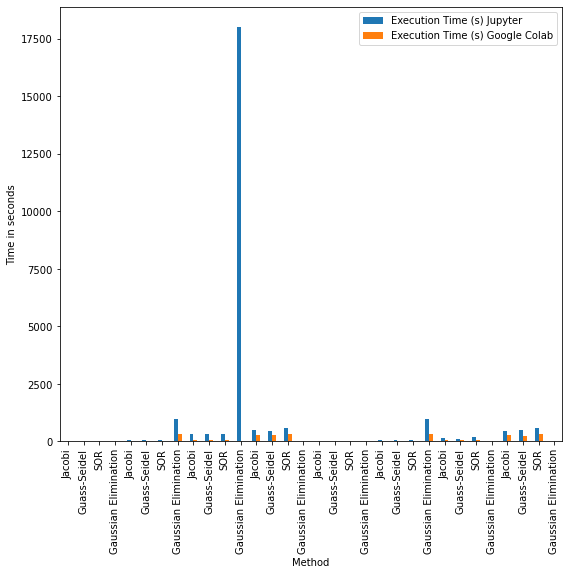

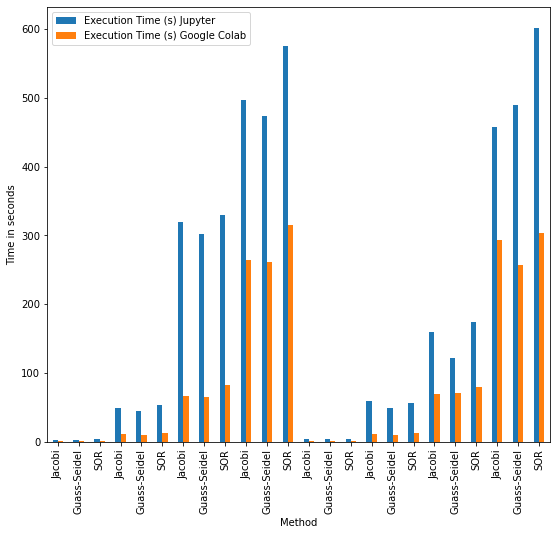

In [ ]:
# A comparison between time of execution between Google colab & Jupyter


# plot the dataframe
Result.plot(x="Method", y=["Execution Time (s) Jupyter", "Execution Time (s) Google Colab"], kind="bar", figsize=(9, 8), ylabel = "Time in seconds")
 
# We will exclude the gaussian eliminatio nsince it was dominant
ResultNoGaussian = Result[Result["Method"] != "Gaussian Elimination"]
ResultNoGaussian.plot(x="Method", y=["Execution Time (s) Jupyter", "Execution Time (s) Google Colab"], kind="bar", figsize=(9, 8),ylabel = "Time in seconds")


<AxesSubplot:xlabel='Method', ylabel='Memory Allocation (KiB)'>

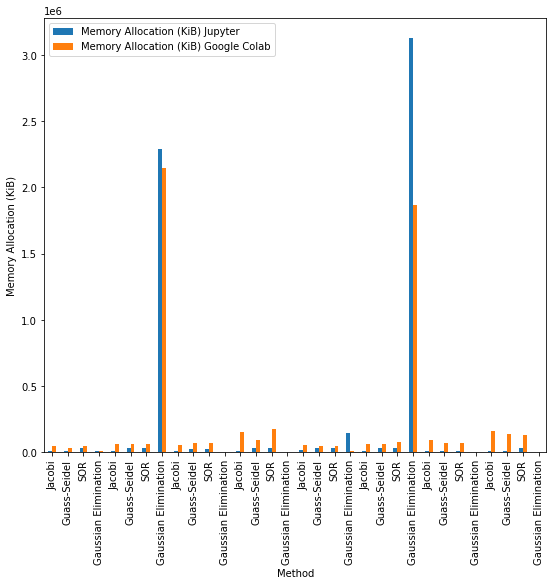

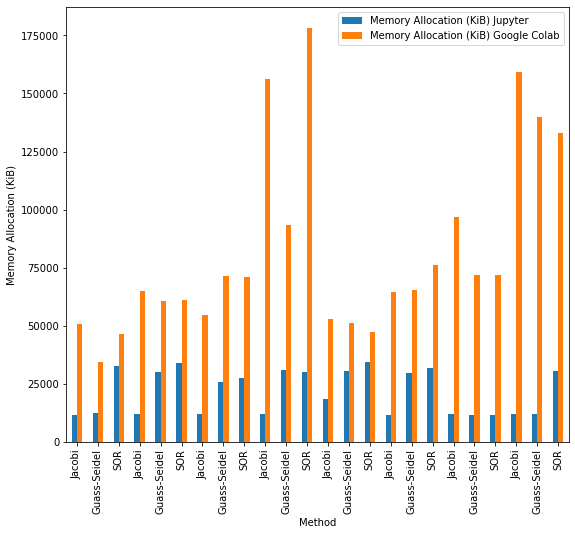

In [ ]:
# Similarly for memory allocation
Result.plot(x="Method", y=["Memory Allocation (KiB) Jupyter", "Memory Allocation (KiB) Google Colab"], kind="bar", figsize=(9, 8), ylabel = "Memory Allocation (KiB)")

# We will exclude the gaussian eliminatio nsince it was dominant
ResultNoGaussian.plot(x="Method", y=["Memory Allocation (KiB) Jupyter", "Memory Allocation (KiB) Google Colab"], kind="bar", figsize=(9, 8), ylabel = "Memory Allocation (KiB)")


## **5.2 Statistics**


In [ ]:
# first, drop with rows with Nan (associated with the gaussian elimination method)
ResultNa = Result.dropna()

ResultNa.groupby("Method")["Execution Time (s) Jupyter","Execution Time (s) Google Colab"].agg([np.min, np.max, np.mean, np.median])

<ipython-input-47-da3ad3fc625e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ResultNa.groupby("Method")["Execution Time (s) Jupyter","Execution Time (s) Google Colab"].agg([np.min, np.max, np.mean, np.median])


Execution Time (s) Jupyter                                 \
                                   amin     amax        mean    median   
Method                                                                   
Guass-Seidel                      2.739  489.361  185.955625   85.9190   
Jacobi                            3.195  496.420  193.335125  108.9560   
SOR                               3.537  602.004  224.892625  115.3595   

             Execution Time (s) Google Colab                                
                                        amin     amax        mean   median  
Method                                                                      
Guass-Seidel                           0.716  261.904   84.563125  37.5300  
Jacobi                                 0.812  293.768   90.031750  39.4515  
SOR                                    0.851  315.509  100.869250  45.8290

In [ ]:
# first, drop with rows with Nan (associated with the gaussian elimination method)
ResultNa = Result.dropna()

ResultNa.groupby("Method")["Memory Allocation (KiB) Jupyter", "Memory Allocation (KiB) Google Colab"].agg([np.min, np.max, np.mean, np.median])

<ipython-input-49-d7ecec1537e4>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ResultNa.groupby("Method")["Memory Allocation (KiB) Jupyter", "Memory Allocation (KiB) Google Colab"].agg([np.min, np.max, np.mean, np.median])


Memory Allocation (KiB) Jupyter                               \
                                        amin     amax       mean   median   
Method                                                                      
Guass-Seidel                         11340.0  30925.0  22788.875  27770.0   
Jacobi                               11456.0  18347.0  12582.375  11880.0   
SOR                                  11402.0  34199.0  28944.500  31072.0   

             Memory Allocation (KiB) Google Colab                       \
                                             amin      amax       mean   
Method                                                                   
Guass-Seidel                              34190.0  139929.0  73526.125   
Jacobi                                    50521.0  159242.0  87375.000   
SOR                                       46468.0  178344.0  85683.125   

                       
               median  
Method                 
Guass-Seidel  68356.5  
Jacobi        64566.0  
SOR           71580.0

## **5.3 Analysis**
Based on the results from the four methods, it is evident that there are some  discrepancies between them. The first notable difference is the execution time. Out of the four methods, Gauss-Seidel was consistently the fastest. This can be traced back to the way that the Gauss-Seidel method converges. Rather than maknig an initial guess and changing it after each iteration like in the Jacobi Method, the Gauss-Seidel method updates its values for variables **X<sub>i</sub>** without going through an entire iteration. This leads to two observations, which can be seen from the code:
1. Gauss-Seidel method requires the least amount of iterations to converge
2. Its rate of convergence is notably faster than the other methods.

<br></br>
It is worth noting that three of the four methods (with the exception of Gaussian Elimination) have a precondition that a matrix be square (size **M x M**). This is an inherent drawback for the methods, since very few real-life applications will have perfectly square matrices. When comparing the methods, an observation was made between Jacobi and Gauss-Seidel  whereby, despite the latter needing the fewest iterations to converge, the reduction in time was not pronounced. For example, the results table shows that, for a 20x20 diagonal matrix, the Jacobi method took 4.82 seconds, whereas Gauss-Seidel took 4.70 seconds. The larger the matrix, the bigger the time difference between them. This means that for exceptionally large systems, the time difference could be large, which means that Gauss-Seidel could be more cost-effective by preserving time.

<br></br>
Another important indicator of effectiveness is the memory allocation of each method. This is a critical criteria, since it is directly correlated with computing power. Therefore, the less memory used, the more economic and feasible the method is for large quantities of data. When comparing the 3 iterative methods, Gauss-Seidel utilized the least amount of memory, by a large margin. When comparing the 100x100 matrices, Jacobi method consumed 175 MiB (MiB), whereas Gauss-Seidel used only 93 MiB. The Successive Over Relaxation Method consumed 160 MiB. It was noticed that the difference between them gets larger as the matrix size increases. In industries that process massive matrix systems to optimize their operations, such as geological surveys or banking institutions, it is imperative that their systems be as efficient as possible.

<br></br>
An important note is to keep in mind that the number of iterations is as an assessmnet for the methods. Execution time depends on several things such as the size of the matrix and the elements' values. Moreover, the time of execution also depends on the way we code the method. To give an illustration, if we replace our Guass-seidel codee with the SOR code and set Relaxation factor to be 1, the time will be higher than it is now because SOR uses two lists while Guass-seidel uses jsut one. However, the trends discussed in the analysis above should remain consistent. It is also worth mentioning that computer speed, specifications, and Google Colab RAM usage affects performance. Therefore, some minor inconsistencies were observed. The recommendation here is to assess these methods on a locally-deployed server and on the same device, in order to obtain more comparable results.

<br></br>
The conclusion from the aforementioned analysis is that Gauss-Seidel is the optimal method for converging large matrices. All of the methods have similar drawbacks, namely that they require square matrices and to be diagonally dominant. However, in situations where these are applicable, Gauss-Seidel has consistently better execution time, and least number of iterations. On ther other side, Jacobi slighlt has better MEmory allocation than Guass-sewidel. Therefore, in situations where both time, memory allocation, and ultimately monetary considerations are necessary, Gauss-Seidel seems to be the optimal method for analysis in general. Also, from the four above plots, we recommend to run it in Google colab when time is your important factor while run it in Jupyter when memory is your important facotr.


# **6. Appendix**
This appendix section includes scripts that cover non-arbitrary and non-diagonal matrices. The objective here is to demonstrate that our code can handle these cases as well.

## 6.1 Solving a Pre-defined Matrix
Although we use random matrix previously, the code can be easily used to solve a specific matrix. Here is an example by using Guass-seidel method. This can be adapted to other methods by using the code for each method in the above section.

In [ ]:
# Ax = b

# inputs
n_it = 3000    # Max number of iterations 
Tol =  3      # Tolerance
 #and the Matrix

A = np.array([[12,3,-5],[1,5,3],[3,7,13]])
B = np.array([[1,28,76]])
Mat_size = list(A.shape)[0] # Just when we specify the matrix (not random)


# Check whether tha matrix is diagonally dominant or not
def dia_dom(X):
    D = np.diag(np.abs(X))            # Find diagonal coefficients
    S = np.sum(np.abs(X), axis=1) - D # Find row sum without diagonal
    if np.all(D >= S):
        dia_dom = 1
        print ('matrix is diagonally dominant \n')
    else:
        dia_dom = 0
        print( 'NOT diagonally dominant \n')
    return dia_dom
    

# Creat a list with intials guesses = 0 and it is size is as the varibles number
i = 0
x = [] # An empty list
while i < Mat_size :
    x.append(0)
    i= i + 1
# print(x)




# This is necessary for i = j = 0 
if dia_dom(A) == 1 :           # To ensure that the condition is valid 
    print("The number of variables is:",Mat_size)
    print("The maximum number of iterations is:",n_it)
    print("The number of digitis for tolerance is:",Tol,"\n") 
    for ii in range(n_it) :
        i = 0                  # Reset after each iteration
        j = -1                 # Reset after each iteration
        while i < Mat_size :   # Less than number of variables
            j = j +1
            if (i == 0) & (j == 0) :   # Otherwise, x[0] in the last line will be subtracted from th previous iteration's value
                x[0] = B[0][0]/A[0][0]
            if j == Mat_size:
                #print(" The final x%i is:" %i,round(x[i],3), "when i =", i, "& j =",j, "\n") # it was used to keep tracking
                i = i + 1
                if i == Mat_size :        # otherwise, we will get an error
                    roundx =  [round(element,3) for element  in x]  # To specify number of decimals
                    if ii == 0 :
                        roundy = roundx
                        print("after iteration:",ii + 1,roundx)
                    else :
                        if roundy == roundx:
                            break
                        #print(" roundx at it=%i is:" %(ii+1),roundx) # To keep tracking
                        #print(" roundy at it=%i is:" %(ii+1),roundy) # To keep tracking
                        roundy = roundx
                        print("after iteration:",ii + 1,roundx)
                    break
                j = 0
                x[i] = B[0][i]/A[i][i]
            #print(x[i])
            if i == j:
                continue
            x[i] = x[i]  -(A[i][j]*x[j])/A[i][i]

matrix is diagonally dominant 

The number of variables is: 3
The maximum number of iterations is: 3000
The number of digitis for tolerance is: 3 

after iteration: 1 [0.083, 5.583, 2.821]
after iteration: 2 [-0.137, 3.935, 3.759]
after iteration: 3 [0.666, 3.212, 3.963]
after iteration: 4 [0.932, 3.036, 3.997]
after iteration: 5 [0.99, 3.004, 4.0]
after iteration: 6 [0.999, 3.0, 4.0]
after iteration: 7 [1.0, 3.0, 4.0]


## 6.2 Non-diagonal Matrix
In case the matrix is not diagonal, no iteration will be executed. This is applicible with both arbitrary or embedded matrices. <br>


In [ ]:
# Ax = b

# inputs
n_it = 3000    # Max number of iterations 
Tol =  3      # Tolerance
 #and the Matrix

A = np.array([[1,3,-5],[1,5,3],[3,7,13]])
B = np.array([[1,28,76]])
Mat_size = list(A.shape)[0] # Just when we specify the matrix (not random)


# Check whether tha matrix is diagonally dominant or not
def dia_dom(X):
    D = np.diag(np.abs(X))            # Find diagonal coefficients
    S = np.sum(np.abs(X), axis=1) - D # Find row sum without diagonal
    if np.all(D >= S):
        dia_dom = 1
        print ('matrix is diagonally dominant \n')
    else:
        dia_dom = 0
        print( 'NOT diagonally dominant \n')
    return dia_dom
    

# Creat a list with intials guesses = 0 and it is size is as the varibles number
i = 0
x = [] # An empty list
while i < Mat_size :
    x.append(0)
    i= i + 1
# print(x)




# This is necessary for i = j = 0 
if dia_dom(A) == 1 :           # To ensure that the condition is valid 
    print("The number of variables is:",Mat_size)
    print("The maximum number of iterations is:",n_it)
    print("The number of digitis for tolerance is:",Tol,"\n") 
    for ii in range(n_it) :
        i = 0                  # Reset after each iteration
        j = -1                 # Reset after each iteration
        while i < Mat_size :   # Less than number of variables
            j = j +1
            if (i == 0) & (j == 0) :   # Otherwise, x[0] in the last line will be subtracted from th previous iteration's value
                x[0] = B[0][0]/A[0][0]
            if j == Mat_size:
                #print(" The final x%i is:" %i,round(x[i],3), "when i =", i, "& j =",j, "\n") # it was used to keep tracking
                i = i + 1
                if i == Mat_size :        # otherwise, we will get an error
                    roundx =  [round(element,3) for element  in x]  # To specify number of decimals
                    if ii == 0 :
                        roundy = roundx
                        print("after iteration:",ii + 1,roundx)
                    else :
                        if roundy == roundx:
                            break
                        #print(" roundx at it=%i is:" %(ii+1),roundx) # To keep tracking
                        #print(" roundy at it=%i is:" %(ii+1),roundy) # To keep tracking
                        roundy = roundx
                        print("after iteration:",ii + 1,roundx)
                    break
                j = 0
                x[i] = B[0][i]/A[i][i]
            #print(x[i])
            if i == j:
                continue
            x[i] = x[i]  -(A[i][j]*x[j])/A[i][i]

NOT diagonally dominant 



# **7. Team Members**
1- Ammar Al hawashem <br>
2- Rashed Abuaez <br>
3- Yasser Al malki <br>
4- Rakan Aal soraye
